# Exercices

## Dérivée numérique décentrée

Pour un ensemble de points de coordonnées $\{(x_i,y_i)\}$ où $y$ est une fonction de $x$, nous avons vu qu'une première approximation pour calculer la dérivée $y' = \frac{\mathrm{d}y}{\mathrm{d}x}$ est de calculer la pente entre deux points consécutifs.

$$
y'_i = \frac{y_{i+1}-y_{i}}{x_{i+1}-x_{i}}
$$

Il est cependant arbitraire d'associer la dérivée en un point avec la pente par rapport au point *suivant*, plutôt que la pente par rapport au point précédent. Une deuxième approximation peut donc s'écrire :

$$
y'_i = \frac{y_{i}-y_{i-1}}{x_{i}-x_{i-1}}
$$

Ces deux approximations sont appelées respectivement *dérivée décentrée à droite* et *dérivée décentrée à gauche*.


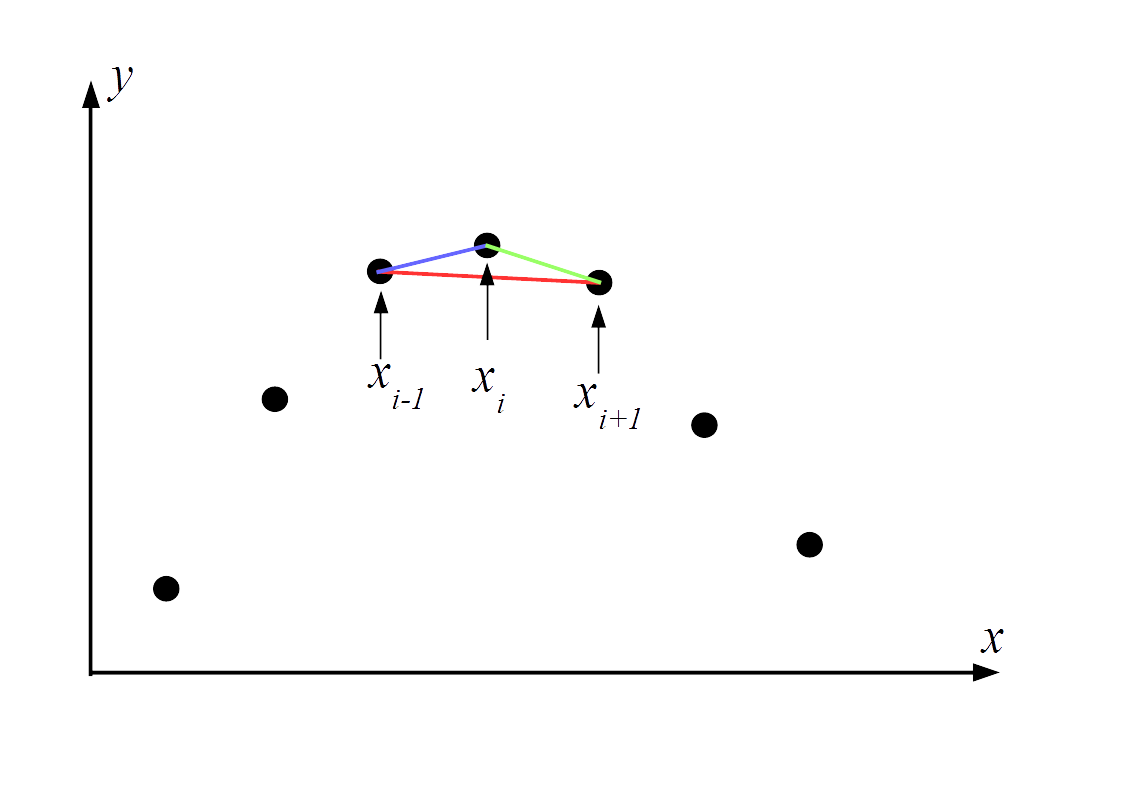

Comme on peut le voir sur la figure ci-dessus, ces deux approximations (en vert et en bleu) ne sont pas toujours satisfaisantes car elles sont arbitrairement biaisées d'un côté ou de l'autre du point considéré.
Une troisième approximation consiste à prendre la pente entre les deux points adjacents au point considéré. Cette approximation est appelée *dérivée centrale* :

$$
y'_i = \frac{y_{i+1}-y_{i-1}}{x_{i+1}-x_{i-1}}
$$

1. Programmez une fonction pour ces trois différentes approximations. La fonction pourra prendre en arguments des points $\{(x_i,y_i)\}$ sous forme de listes ou de tableaux `numpy` (plusieurs solutions sont possibles).

2. Comparez les résultats obtenus pour les trois fonctions mathématiques connues que vous avez dérivées mathématiquement dans le calepin à préparer pour aujourd'hui, et comparez au résultat théorique. On prendra pour la liste de points en abscisse un intervalle contenu dans l'intervalle de définition de la fonction et un pas de 0,1 pour commencer.

3. Quantifiez et affichez l'erreur entre les 3 méthodes numériques, et le résultat théorique. Faites varier le pas de la dérivée et observez son influence sur la précision obtenue.

## Dérivée d'une courbe expérimentale

En physique expérimentale, il est rare d'analyser des points bien sagement ordonnés avec une précision à 12 chiffres. De plus, toute mesure expérimentale contient du bruit.

Dans la suite, vous allez essayer de dériver un exemple de courbe expérimentale à partir des données brutes.

1. Importez le fichier de données *dataBSCCO.csv* (par exemple avec le module `pandas`) qui contient une mesure de résistance d'un échantillon 2D de supraconducteur à haute température critique (le $\mathrm{Bi}_2\mathrm{Sr}_2\mathrm{CaCu}_2\mathrm{O}_{8+\delta}$) en fonction de la température. Affichez quelques lignes de son contenus, ainsi qu'un graphe des données *Rs* (résistance 2D en ohms par carré - $\Omega/\square$ abbrégé *Ohmsq*) en fonction de *T* (température en kelvins).

Vous pouvez essayer d'utiliser les méthodes de dérivation numériques précédentes sur cette courbe. *A priori* ça ne marchera pas car les données *T(K)* ne sont pas uniformément réparties et ne varient pas de façon strictement monotone.

Avant de dériver cette courbe, il faut donc mettre en forme les données. On peut par exemple :
- Interpoler les données sur un tableau régulier avec la fonction `numpy.interp`.
- Moyenner localement la courbe. Créer un tableau régulier en abscisse {$x_i$} avec un pas $p$, sélectionner les points de données tels que $|T-x_i|<p$ et en faire une moyenne pour chaque $i$.

2. Créez une nouvelle fonction qui permet de créer, à partir des données brutes, des données qui pourront être utilisées par les méthodes de dérivation créées précédemment.

3. Appliquez cette nouvelle fonction aux données brutes et étudiez le comportement de la dérivée en fonction du pas choisi.

## Intégration numérique

Nous allons étudier plusieurs méthodes d'intégration numérique. Nous commençons par rappeler la méthode des rectangles vue dans la partie cours.

### Méthode des rectangles

Pour une fonction intégrable $f$, on cherche à calculer l'intégrale suivante :
$$
I(f) = \int_{a}^{b} f(x)\mathrm{d}x 
$$
On choisit de discrétiser l'intervalle $[a,b]$ en $n$ intervalles de même longueur, repérés par les points $x_i = a+i\times \Delta x$ avec $\Delta x=\frac{b-a}{n}$ . Une approximation de l'intégrale $I(f)$ est donnée par :
$$
I(f) \approx  I_n(f) = \sum_{i=0}^{n-1} f(x_i)\Delta x 
$$


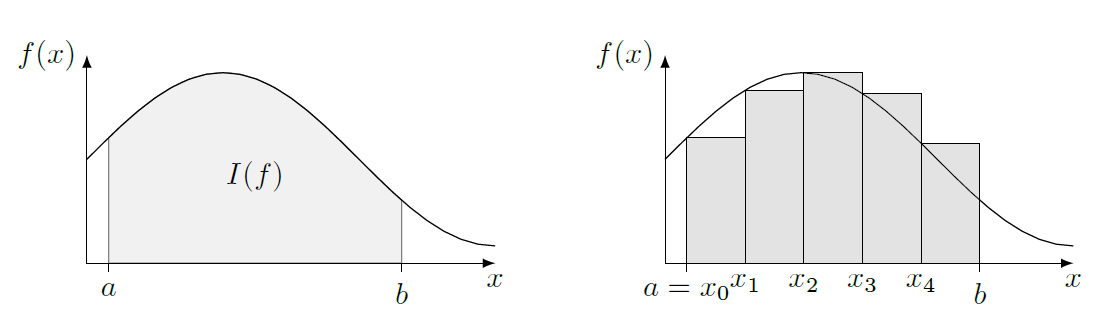

### Méthode du point milieu

Une approximation plus précise de l'intégrale $I(f)$ peut être calculée en considérant les valeurs de $f$ au centre des $n$ intervalles considérés. C'est-à-dire les points de coordonnées $x_i = a + (i+1/2)\times\Delta x$. L'intervalle est alors calculé par l'approximation :
$$
J_n(f) = \sum_{i=0}^{n-1} f(x_i)\Delta x  
$$

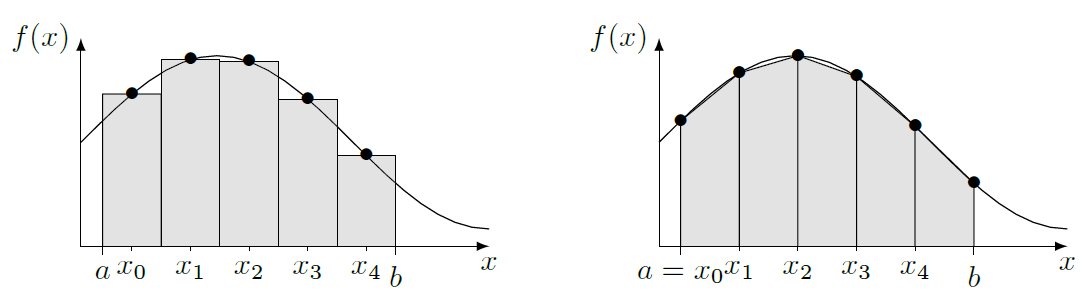

### Méthode des trapèzes
Enfin, la méthode des trapèzes consiste à approximer la fonction $f$ par une fonction affine par morceaux entre les points de coordonnées $x_i = a + i\times\Delta x$. On peut alors calculer l'intégrale :
$$
K_n(f) = \sum_{i=0}^{n-1} \frac{f(x_i)+f(x_{i+1})}{2}\Delta x 
$$

1. Implémentez ces trois méthodes d'intégration numérique sous la forme de fonctions. On pourra mettre en arguments des fonctions : la fonction à intégrer, les bornes d'intégrations et le nombre de points d'intégration.


2. Appliquez ces méthodes d'intégration aux trois fonctions données en introduction et comparez aux valeurs analytiques que vous aurez calculées en choisissant des bornes appropriées.

3. Étudiez le comprtement de l'erreur d'approximation avec le nombre de points. On pourra par exemple tracer un graphe de l'erreur en fonction du nombre de points (10, 100, 1000, etc.)

## Pour aller plus loin

Dérivation et intégration étant incontournables en mathématiques et en physique, il serait étonnant de ne pas trouver ces outils dans certains modules. Le module `scipy` propose en effet les fonctions `derivative` et `integrate`, dont vous pouvez consulter la documentation :
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.misc.derivative.html
- https://docs.scipy.org/doc/scipy/reference/integrate.html

On peut également mentionner le module `sympy` qui permet de différencier et intégrer de manière formelle.

In [ ]:
import sympy as sp
x, y, z = sp.symbols('x y z')

In [ ]:
sp.diff(sp.tan(x), x)

In [ ]:
sp.integrate(sp.tan(x), x)